# Reading the data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
path = 'stored_data_case.h5'

In [3]:
def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
         return store[table]

In [4]:
df = read_HDF_file(path,'/transaction_and_locations')

In [5]:
df.head()

,parkmeter_id,user_type,payment_method,amount,duration_hours,parking_start,parking_end,parkmeter_address,arrondissement,system,residential_area,hourly_rate,parkmeter_coordinates
0,66391001,Rotatif,CB,2.4,2.00,2014-09-09 14:02:44,2014-09-09 16:02:44,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
1,66391001,Rotatif,Paris Carte,0.3,0.25,2014-02-09 14:18:09,2014-02-09 14:33:09,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2084,66391001,Rotatif,CB,0.6,0.50,2014-05-09 18:55:21,2014-05-09 19:25:21,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2085,66391001,Rotatif,CB,0.9,0.75,2014-08-09 16:30:32,2014-08-09 17:15:32,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2086,66391001,Rotatif,Paris Carte,0.3,0.25,2014-01-09 18:40:25,2014-01-09 18:55:25,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"


In [7]:
df_sample = df.sample(n=1000)

# Demand exploration

In [13]:
#df_demand = df[['parkmeter_id', 'parking_start', 'parking_end', 'residential_area']].copy()
#df_demand['year'] = [time.year for time in df_demand['parking_start']]
#df_temp = df_demand.copy()
#df_temp['start_date'] = [time.strftime("%Y-%m-%d") for time in df_temp['parking_start']]
#df_temp['end_date'] = [time.strftime("%Y-%m-%d") for time in df_temp['parking_end']]
#df_temp.to_csv('csv/df_to_group.csv') # 2GB !! 

#df_temp = pd.read_csv('df_to_group.csv') 

## *Demand: Number of Parking Start*

In [14]:
df_temp.head()

,parkmeter_id,parking_start,parking_end,residential_area,year,start_date,end_date
0,66391001,2014-09-09 14:02:44,2014-09-09 16:02:44,16Z,2014,2014-09-09,2014-09-09
1,66391001,2014-02-09 14:18:09,2014-02-09 14:33:09,16Z,2014,2014-02-09,2014-02-09
2084,66391001,2014-05-09 18:55:21,2014-05-09 19:25:21,16Z,2014,2014-05-09,2014-05-09
2085,66391001,2014-08-09 16:30:32,2014-08-09 17:15:32,16Z,2014,2014-08-09,2014-08-09
2086,66391001,2014-01-09 18:40:25,2014-01-09 18:55:25,16Z,2014,2014-01-09,2014-01-09


In [15]:
df = df_temp.groupby(['residential_area','parkmeter_id','start_date'], as_index = False)['parking_start'].count()
# count on any day 
df = df.groupby(['residential_area','parkmeter_id'], as_index = False)['parking_start'].mean()
# average count by parkmeter by day 
df.head()

,residential_area,parkmeter_id,parking_start
0,10E,1960103,10.637224
1,10E,1960201,14.571429
2,10E,4780101,8.112500
3,10E,9520102,3.787645
4,10E,9520201,18.810241


In [16]:
df_zones = df.groupby('residential_area', as_index = False)['parking_start'].sum()

In [17]:
df_zones.head()

,residential_area,parking_start
0,10E,578.023403
1,10F,543.834036
2,10G,646.885189
3,11E,461.654060
4,11F,479.944423


/Users/louislimnavong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


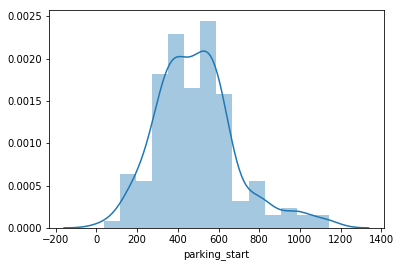

In [18]:
x_all = df_zones['parking_start']
sns.distplot(x_all)
plt.show()

In [19]:
df_zones['parking_start'].describe()

count     160.000000
mean      489.249189
std       196.366168
min        34.860405
25%       361.092429
50%       478.321627
75%       588.037217
max      1143.863300
Name: parking_start, dtype: float64

In [29]:
def demand_categories(count):
    if count >= 700: 
        return 'high'
    if count >= 500 and count < 700: 
        return 'medium high'
    if count >= 350 and count < 500: 
        return 'medium low'
    if count < 350: 
        return 'low'

In [30]:
df_zones['demand_category'] = [demand_categories(count) for count in df_zones['parking_start']]
df_zones.head()

,residential_area,parking_start,demand_category
0,10E,578.023403,medium high
1,10F,543.834036,medium high
2,10G,646.885189,medium high
3,11E,461.654060,medium low
4,11F,479.944423,medium low


In [32]:
temp = df_zones.groupby('demand_category').count().reset_index()
temp.head()

,demand_category,residential_area,parking_start
0,high,17,17
1,low,37,37
2,medium high,58,58
3,medium low,48,48


In [33]:
df_zones[df_zones['demand_category'] == 'high']

,residential_area,parking_start,demand_category
9,11L,769.073866,high
27,13L,877.448792,high
28,13M,975.988031,high
41,14N,997.580159,high
46,15H,968.144981,high
90,17R,815.717163,high
117,1E,849.162880,high
130,34F,760.265586,high
131,3E,1118.719420,high
132,4E,733.364445,high


In [35]:
#df_zones.to_excel('tables/demand_category.xlsx')

In [34]:
#df_zones.to_csv('csv/demand_category.csv')